<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Hierarchical_clustering_structured_vs_unstructured_ward_Rayi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra
1103213070
Task Lecture 6
**Hierarchical clustering: structured vs unstructured ward**

In [7]:
import time
import numpy as np  # Menambahkan baris ini untuk mengimpor numpy

# Waktu sebelum pemrosesan
start_time = time.time()

# Kodingan atau proses yang ingin diukur waktunya
# Misalnya:
# Simulasi penghitungan
for i in range(1000000):
    _ = np.sqrt(i)

# Waktu setelah pemrosesan
end_time = time.time()

# Waktu total
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.3f} seconds")


Elapsed time: 2.330 seconds


**Generate data**

In [8]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5


**Compute clustering**

In [9]:
from sklearn.cluster import AgglomerativeClustering

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")


Compute unstructured hierarchical clustering...
Elapsed time: 0.06s
Number of points: 1500


**Plot result**

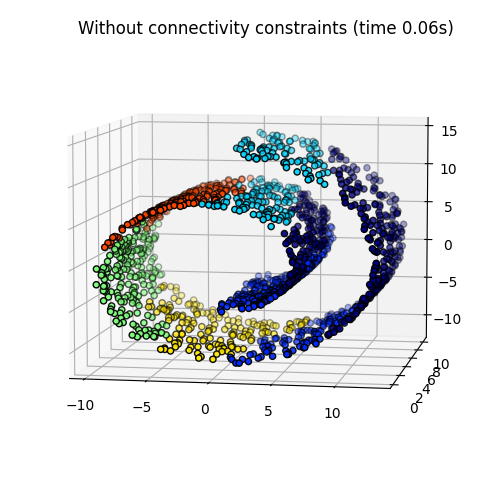

In [10]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")


**Compute clustering**

In [11]:
import time
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")


Compute structured hierarchical clustering...
Elapsed time: 0.09s
Number of points: 1500


**Plot result**

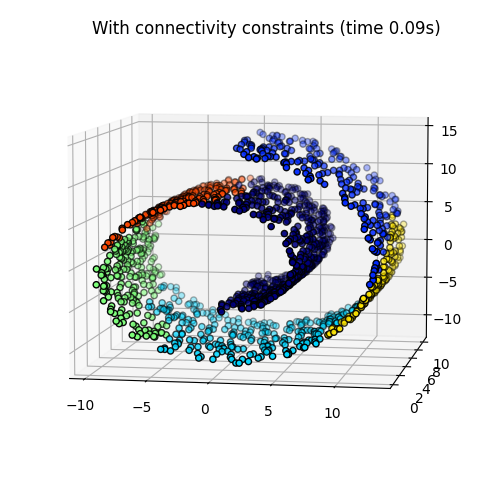

In [12]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=-80)
ax2.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
fig2.suptitle(f"With connectivity constraints (time {elapsed_time:.2f}s)")

plt.show()
